In [ ]:
# Import necessary libraries


In [1]:
pip install matplotlib -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn -q

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install keras -q

Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install tensorflow -q

In [ ]:
pip install scipy -q

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [7]:
#download dataset from kaggle 

In [8]:
import subprocess

In [9]:
kaggle_download_command = "kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset"

In [10]:
subprocess.run(kaggle_download_command, shell=True)

CompletedProcess(args='kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset', returncode=1)

In [11]:
import zipfile
import os

In [12]:
# Define the path to the zip file containing images
zip_file_path =  r"C:\Users\simon\OneDrive\Skrivbord\dataset_images.zip"

# Define the folder where images will be extracted
extracted_folder_path = 'dataset_images' 

# Extract images from the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder_path)

# Extract images from the zip file
image_files = os.listdir(os.path.join(extracted_folder_path, 'images'))

In [13]:
#displaying image 
picture_size = 48
folder_path = "dataset_images/images"

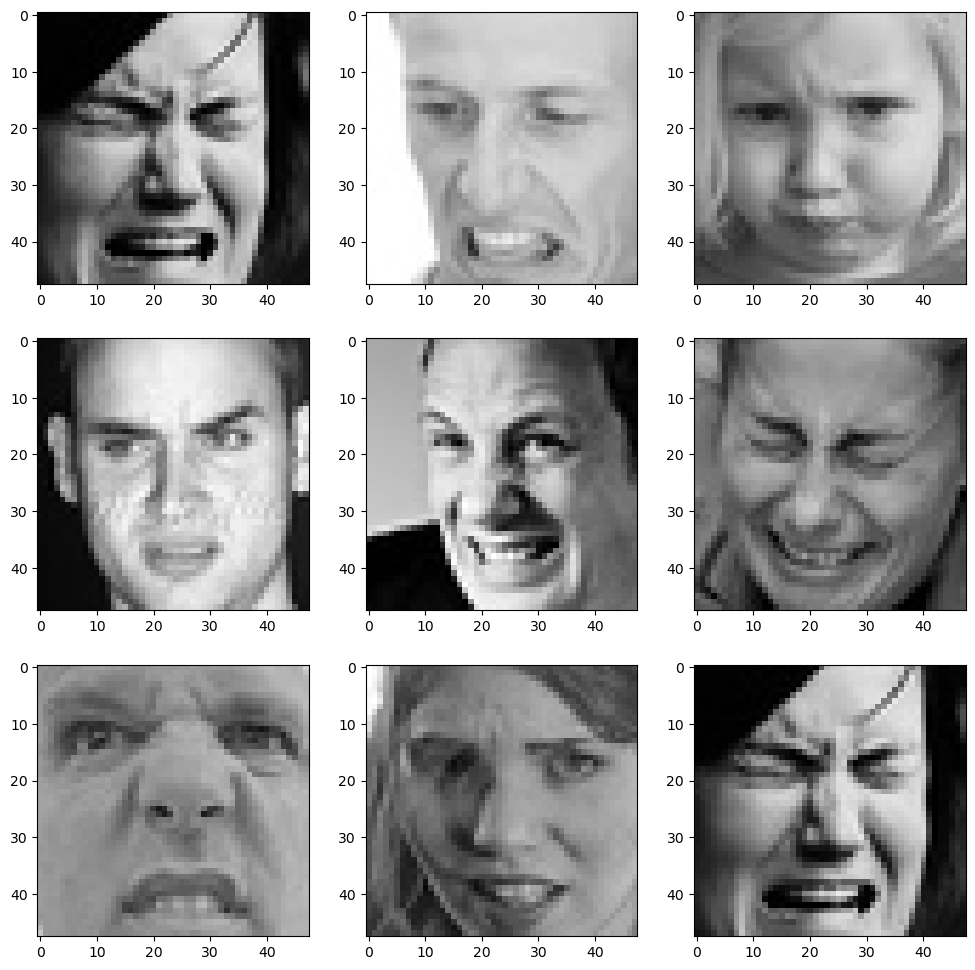

In [14]:
# Define the target expression for visualization
expression = 'disgust'

# Create a 3x3 grid to display some sample images
plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img_path = os.path.join(folder_path, "train", expression, os.listdir(os.path.join(folder_path, "train", expression))[i])
    img = load_img(img_path, target_size=(picture_size, picture_size))
    plt.imshow(img)   
plt.show()

In [15]:
# Making Training and Validation Data

In [16]:
# Create a 3x3 grid to display some sample images
batch_size  = 128

# Create data generators for training and validation data
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

# Create data generators for training and validation data
train_set = datagen_train.flow_from_directory("dataset_images/images/train",
                                              target_size=(picture_size, picture_size),
                                              color_mode="grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory("dataset_images/images/validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [17]:
# Model Building

In [18]:
from keras.optimizers import Adam,SGD,RMSprop


no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (Batch  (None, 48, 48, 64)        256       
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [19]:
# Fitting the Model with Training and Validation Data 

In [20]:
import scipy

In [21]:
from keras.optimizers import RMSprop, SGD, Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Define and configure callbacks for model training
checkpoint = ModelCheckpoint("./model.h5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                               min_delta=0,
                               patience=3,
                               verbose=1,
                               restore_best_weights=True
                               )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                                         factor=0.2,
                                         patience=3,
                                         verbose=1,
                                         min_delta=0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

# Set the number of training epochs
epochs = 48

# Define and compile the model
opt = Adam(learning_rate=0.001)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,  
              metrics=['accuracy'])

In [22]:
# Train the model and save training history
history = model.fit(train_set,
                    steps_per_epoch=train_set.n//train_set.batch_size,
                    epochs=epochs,
                    validation_data=test_set,
                    validation_steps=test_set.n//test_set.batch_size,
                    callbacks=callbacks_list)

Epoch 1/48
225/225 [==============================] - 528s 2s/step - loss: 1.7410 - accuracy: 0.3348 - val_loss: 1.5073 - val_accuracy: 0.4290 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - 416s 2s/step - loss: 1.4123 - accuracy: 0.4564 - val_loss: 1.3869 - val_accuracy: 0.4604 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - 414s 2s/step - loss: 1.2729 - accuracy: 0.5120 - val_loss: 1.3347 - val_accuracy: 0.4868 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - 409s 2s/step - loss: 1.1847 - accuracy: 0.5476 - val_loss: 1.2514 - val_accuracy: 0.5156 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - 432s 2s/step - loss: 1.1307 - accuracy: 0.5683 - val_loss: 1.1424 - val_accuracy: 0.5648 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - 392s 2s/step - loss: 1.0720 - accuracy: 0.5919 - val_loss: 1.1855 - val_accuracy: 0.5476 - lr: 0.0010
Epoch 7/48
225/225 [==============================] - 435s 2s/st

In [23]:
# Plotting Accuracy & Loss

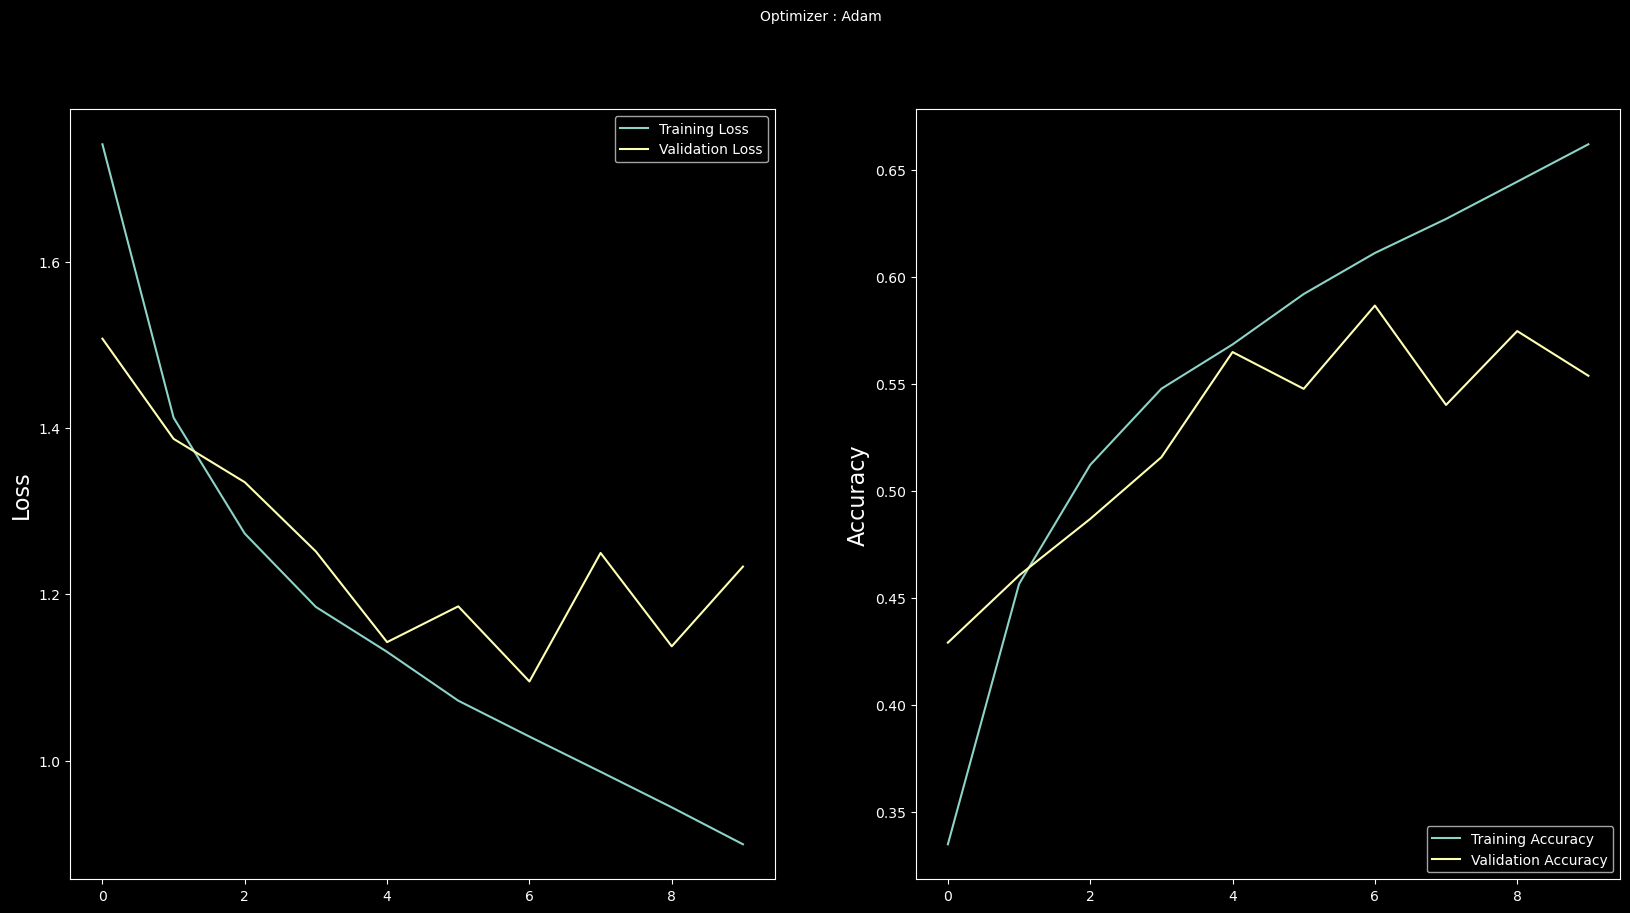

In [24]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()